The Airy differential equation is
\begin{equation}
    \frac{d^2y}{dz^2} = zy.
\end{equation}
We want to solve this along a ray from the origin to a target complex number. We can parameterise any point $z$ on this ray using a real variable $t$ which represents the distance from the origin. Let $z^* = re^{i\theta}$. Then a point on the ray is $z(t) = te^{i\theta}$ for $0 \leq t \leq r$. Let $Y(t) = y(z(t))$ be the solution along the ray. By the chain rule,
\begin{align}
    \frac{dz}{dt} &= e^{i\theta}, \\
    \frac{dy}{dz} &= \frac{dY}{dt}\frac{dt}{dz} = \frac{dY}{dt}e^{-i\theta}, \\
    \frac{d^2y}{dz^2} &= \frac{d}{dt}\left(\frac{dY}{dt}e^{-i\theta}\right) \frac{dt}{dz} = \frac{d^2Y}{dt^2}e^{-2i\theta}.
\end{align}
Substituting these into the Airy equation gives
\begin{equation}
    \frac{d^2Y}{dt^2} = te^{3i\theta}Y(t).
\end{equation}
Decomposing $Y(t) = u(t) + iv(t)$ into real and imaginary parts,
\begin{align}
    \frac{d^2u}{dt^2} + i\frac{d^2v}{dt^2}
    &= t(\cos 3\theta + i\sin 3\theta)(u + iv) \\
    &= t(u\cos 3\theta - v\sin 3\theta) + it(u\sin 3\theta + v\cos 3\theta).
\end{align}
By equating the real and imaginary parts, we get a system of two coupled second-order ODEs
\begin{align}
    \frac{d^2u}{dt^2} = t(u\cos 3\theta - v\sin 3\theta), \\
    \frac{d^2v}{dt^2} = t(u\sin 3\theta + v\cos 3\theta).
\end{align}
We need to convert this into a system of four first-order ODEs by defining $p(t) = \frac{du}{dt}$ and $q(t) = \frac{dv}{dt}$. The state of our system is the vector $S(t) = (u(t), v(t), p(t), q(t))$. The system is
\begin{align}
    \frac{du}{dt} &= p, \quad \frac{dv}{dt} = q, \\
    \frac{dp}{dt} &= t(u\cos 3\theta - v\sin 3\theta), \\
    \frac{dq}{dt} &= t(u\sin 3\theta + v\cos 3\theta).
\end{align}
The initial conditions are given at $z=0$, which corresponds to $t=0$,
\begin{equation}
    Bi(0) = \sqrt{3}\alpha, \quad Bi'(0) = \sqrt{3}\beta.
\end{equation}
From this, we find $Y(0) = u(0) + iv(0)$ so
\begin{equation}
    u(0) = \sqrt{3}\alpha, \quad v(0) = 0.
\end{equation}
For the derivatives, we have $\frac{dY}{dt} = \frac{dy}{dz}e^{i\theta}$. At $t=0$,
\begin{equation}
    p(0) = \sqrt{3}\beta\cos\theta, \quad q(0) = \sqrt{3}\beta\sin\theta.
\end{equation}


In [3]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.special import gamma
from scipy.special import airy
import matplotlib.pyplot as plt

GAMMA_2_3 = gamma(2/3)
GAMMA_1_3 = gamma(1/3)
ALPHA = 1 / (3**(2/3) * GAMMA_2_3)
BETA = 1 / (3**(1/3) * GAMMA_1_3)

def airy_ode_system(t, S, theta):
    '''
    Defines the system of differential equations for the Airy function.
    Args:
        t: The current integration variable (distance along the ray).
        S: The state vector [u, v, p, q].
        theta: The angle of the integration ray.
    Returns:
        the derivatives [du/dt, dv/dt, dp/dt, dq/dt].
    '''
    u, v, p, q = S

    cos3theta = np.cos(3 * theta)
    sin3theta = np.sin(3 * theta)

    du_dt = p
    dv_dt = q
    dp_dt = t * (u * cos3theta - v * sin3theta)
    dq_dt = t * (u * sin3theta + v * cos3theta)

    return [du_dt, dv_dt, dp_dt, dq_dt]

Simple Check: Bi(1) = 1.20742 (Expected: ~1.20742)
Bi(2.0000) = 3.298095+0.000000j
Bi(4.0000) = 83.847072+0.000000j
Bi(8.0000) = 1199586.009412+0.000000j
Bi(16.0000) = 957212402211272192.000000+0.000000j
Bi(0.8660+0.5000j) = 0.980296+0.358484j
Bi(7.0711+7.0711j) = 921.766939+420.610963j


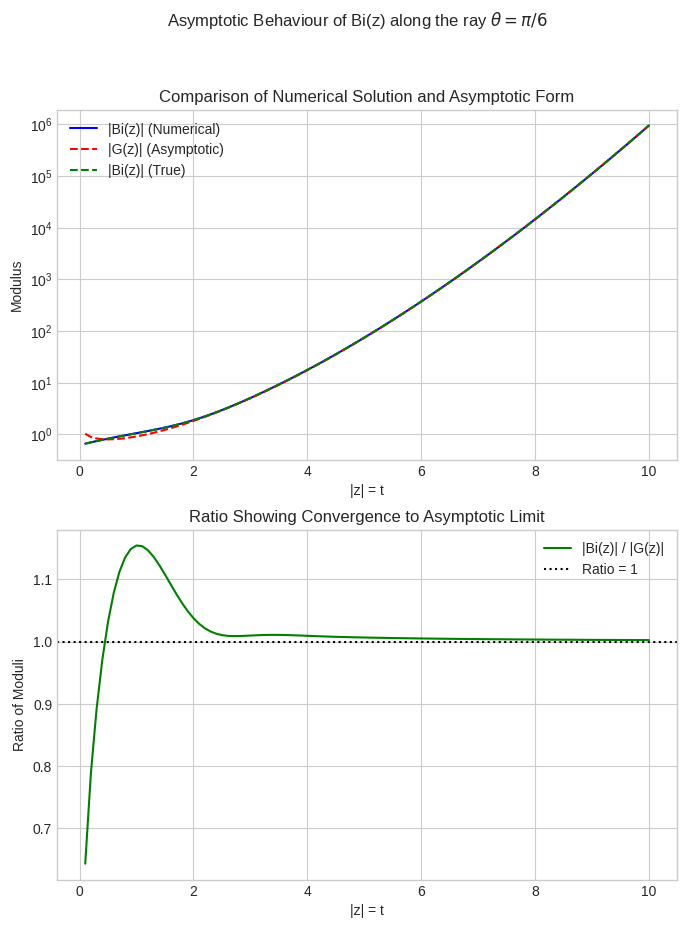

In [7]:
def solve_bi(z_target):
    '''
    Calculates Bi(z) by numerically integrating the Airy equation.
    Args:
        z_target: The complex point at which to evaluate Bi(z).
    Returns:
        The value of Bi(z_target).
    '''
    if z_target == 0:
        return np.sqrt(3) * ALPHA

    r = np.abs(z_target)
    theta = np.angle(z_target)

    # Initial conditions for Bi(z)
    u0 = np.sqrt(3) * ALPHA
    v0 = 0
    p0 = np.sqrt(3) * BETA * np.cos(theta)
    q0 = np.sqrt(3) * BETA * np.sin(theta)
    S0 = [u0, v0, p0, q0]

    # Time span for integration
    t_span = [0, r]

    # Solve the ODE system with high accuracy
    sol = solve_ivp(
        fun=airy_ode_system,
        t_span=t_span,
        y0=S0,
        args=(theta,),
        dense_output=True,
        rtol=1e-9,
        atol=1e-9
    )

    # The final state vector contains the solution at t=r
    u_final, v_final, _, _ = sol.y[:, -1]

    return u_final + 1j * v_final

def G(z):
    '''
    Asymptotic form of Bi(z)
    '''
    return (1 / np.sqrt(np.pi)) * (z**(-1/4)) * np.exp((2/3) * (z**(3/2)))

def Bi(z):
    '''
    True form of Bi(z)
    '''
    return airy(z)[2]

z_check = 1
bi_check = solve_bi(z_check)
print(f"Simple Check: Bi({z_check}) = {bi_check.real:.5f} (Expected: ~1.20742)")

z_points = [
    2, 4, 8, 16,
    np.exp(1j * np.pi / 6),
    10 * np.exp(1j * np.pi / 4) # Chosen non-real point
]

for z in z_points:
    result = solve_bi(z)
    print(f"Bi({z:.4f}) = {result:.6f}")

# Choose a ray
theta_ray = np.pi / 6
t_values = np.linspace(0.1, 10, 100) # Start from 0.1 to avoid singularity in G(z)
z_ray = t_values * np.exp(1j * theta_ray)

# Calculate Bi(z) and G(z) along the ray
bi_values_ray = np.array([solve_bi(z) for z in z_ray])
g_values_ray = G(z_ray)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle(f'Asymptotic Behaviour of Bi(z) along the ray $\\theta = \\pi/6$')

ax1.plot(t_values, np.abs(bi_values_ray), label='|Bi(z)| (Numerical)', color='blue')
ax1.plot(t_values, np.abs(g_values_ray), label='|G(z)| (Asymptotic)', linestyle='--', color='red')
ax1.plot(t_values, np.abs(Bi(z_ray)), label='|Bi(z)| (True)', linestyle='--', color='green')
ax1.set_xlabel('|z| = t')
ax1.set_ylabel('Modulus')
ax1.set_title('Comparison of Numerical Solution and Asymptotic Form')
ax1.legend()
ax1.set_yscale('log')

ratio = np.abs(bi_values_ray) / np.abs(g_values_ray)
ax2.plot(t_values, ratio, label='|Bi(z)| / |G(z)|', color='green')
ax2.axhline(1, color='black', linestyle=':', label='Ratio = 1')
ax2.set_xlabel('|z| = t')
ax2.set_ylabel('Ratio of Moduli')
ax2.set_title('Ratio Showing Convergence to Asymptotic Limit')
ax2.legend()

plt.show()

To calculate $Ai(z)$, we only need to change the initial conditions of the integration. The underlying system of differential equations remains the same.
The initial conditions for $Ai(z)$ are
\begin{equation}
    Ai(0) = \alpha, \quad Ai'(0) = -\beta.
\end{equation}
Following the same derivation as for $Bi(z)$, we determine the initial state vector, $Y(0) = u(0) + iv(0) = Ai(0) = \alpha$. This gives
\begin{equation}
    u(0) = \alpha, \quad v(0) = 0.
\end{equation}
The derivative $\frac{dY}{dt}$ at $t=0$ gives
\begin{equation}
    p(0) = -\beta\cos\theta, \quad q(0) = -\beta\sin\theta.
\end{equation}

Simple Check: Ai(1) = 0.13529 (Expected: ~0.13529)
Ai(2.0000) = 0.034924+0.000000j
Ai(4.0000) = 0.000952+0.000000j
Ai(8.0000) = 0.000041+0.000000j
Ai(16.0000) = 32782964.431722+0.000000j
Ai(0.8660+0.5000j) = 0.140138-0.088683j
Ai(7.0711+7.0711j) = 0.000034-0.000036j


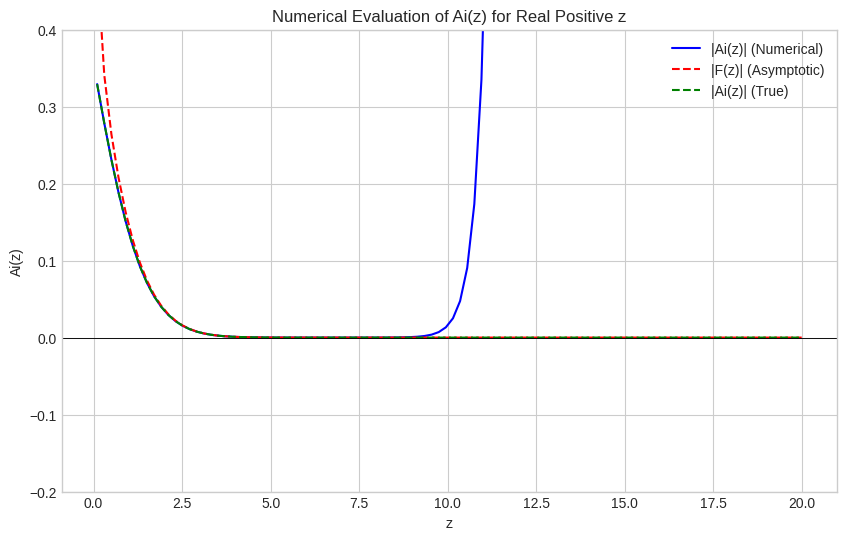

In [42]:
def solve_ai(z_target):
    '''
    Calculates Ai(z) by numerically integrating the Airy equation.

    Args:
        z_target: The complex point at which to evaluate Ai(z).

    Returns:
        The value of Ai(z_target).
    '''
    if z_target == 0:
        return ALPHA

    r = np.abs(z_target)
    theta = np.angle(z_target)

    # Initial conditions for Ai(z)
    u0 = ALPHA
    v0 = 0
    p0 = -BETA * np.cos(theta)
    q0 = -BETA * np.sin(theta)
    S0 = [u0, v0, p0, q0]

    t_span = [0, r]

    sol = solve_ivp(
        fun=airy_ode_system,
        t_span=t_span,
        y0=S0,
        args=(theta,),
        dense_output=True,
        rtol=1e-9,
        atol=1e-9
    )

    u_final, v_final, _, _ = sol.y[:, -1]

    return u_final + 1j * v_final

def F(z):
    '''
    Asymptotic form of Ai(z)
    '''
    # Caveat: multiple by 0.5 for the correct form
    return 0.5 * (1 / np.sqrt(np.pi)) * (z**(-1/4)) * np.exp((-2/3) * (z**(3/2)))

def Ai(z):
    '''
    True form of Ai(z)
    '''
    return airy(z)[0]

z_check = 1
ai_check = solve_ai(z_check)
print(f"Simple Check: Ai({z_check}) = {ai_check.real:.5f} (Expected: ~0.13529)")

z_points = [
    2, 4, 8, 16,
    np.exp(1j * np.pi / 6),
    10 * np.exp(1j * np.pi / 4)
]

for z in z_points:
    result = solve_ai(z)
    print(f"Ai({z:.4f}) = {result:.6f}")

z_real = np.linspace(0.1, 20, 100)
ai_real_numerical = np.array([solve_ai(z) for z in z_real])


plt.figure(figsize=(10, 6))
plt.plot(z_real, np.abs(ai_real_numerical), label='|Ai(z)| (Numerical)', color='blue')
plt.plot(z_real, np.abs(F(z_real)), label='|F(z)| (Asymptotic)', linestyle='--', color='red')
plt.plot(z_real, np.abs(Ai(z_real)), label='|Ai(z)| (True)', linestyle='--', color='green')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Numerical Evaluation of Ai(z) for Real Positive z')
plt.xlabel('z')
plt.ylabel('Ai(z)')
plt.axhline(0, color='black', linewidth=0.5)
plt.ylim(-0.2, 0.4)
plt.grid(True)
plt.legend()
plt.show()

Initially, the numerical solution is a good approximation to the true solution, but for larger values, the numerical solution diverges to infinity. At that point, the asymptotic formula gives a good approximation. The issue stems from the fundamental nature of the general solution to the Airy equation. The initial conditions and all subsequent calculations are performed with finite-precision floating-point arithmetic. This unavoidable tiny initial error is equivalent to starting with $B$ being a very small non-zero number so eventually, $Bi(z)$ takes over as $Ai(z)$ is subdominant in the right-half plane $|\arg z| < \pi/3$.

One way to avoid this problem is, instead of integrating from $z = 0$ towards infinity, to start from a value of $z$ with large modulus, and step towards the origin. The asymptotic expansion for $Ai(z)$ (and the derivative of this expansion) can be used to approximate the initial conditions. As we integrate towards the origin, the dominant $Bi(z)$ solution decays exponentially whereas the $Ai(z)$ solution grows. Therefore, the integration is numerically stable and it naturally converges onto the $Ai(z)$ solution.

The only remaining source of error is the accuracy of our starting approximation at $|z| = a$ using the asymptotic series. However, by choosing a sufficiently large $a$, we can make this initial error arbitrarily small. We use the zeroth-order term of the asymptotic expansion F(z)
\begin{equation}
    F(z_*) = \frac{1}{\sqrt{\pi}}z_*^{-1/4}\exp(-(2/3)z_*^{3/2}).
\end{equation}
The leading-order term of this derivative is:
\begin{equation}
    F'(z_*) ≈ -z_*^{1/4}F(z_*).
\end{equation}

In [97]:
def F_asymptotic(z):
    """
    Zeroth-order asymptotic approximation for Ai(z).
    """
    if z == 0: return np.nan
    return 0.5 * (1 / np.sqrt(np.pi)) * (z**(-0.25)) * np.exp(-(2/3) * (z**1.5))

def F_prime_asymptotic(z):
    """
    Zeroth-order asymptotic approximation for Ai'(z).
    """
    if z == 0: return np.nan
    return -0.5 * (1 / np.sqrt(np.pi)) * (z**(0.25)) * np.exp(-(2/3) * (z**1.5))

def solve_ai_backwards(z_target, a=25.0):
    '''
    Calculates Ai(z) by integrating inwards from |z|=a.

    Args:
        z_target: The complex point at which to evaluate Ai(z).
        a: The starting modulus for the backwards integration.

    Returns:
        The value of Ai(z_target).
    '''
    if z_target == 0:
        # Cannot integrate to the origin, but we know the value
        # from the introduction document
        from scipy.special import gamma
        return 1 / (3**(2/3) * gamma(2/3))

    r = np.abs(z_target)
    theta = np.angle(z_target)

    # Ensure starting point 'a' is beyond the target 'r'
    if a <= r:
        raise ValueError(f"Starting modulus 'a' ({a}) must be greater than target modulus 'r' ({r}).")

    # Define the starting point on the ray
    z_start = a * np.exp(1j * theta)

    # Calculate initial conditions at z_start using asymptotic formulae
    y_start = F_asymptotic(z_start)
    y_prime_start = F_prime_asymptotic(z_start)

    # Convert y' to dY/dt
    # dY/dt = (dy/dz) * e^(i*theta)
    dYdt_start = y_prime_start * np.exp(1j * theta)

    # Set up the initial state vector S0 at t=a
    u0 = y_start.real
    v0 = y_start.imag
    p0 = dYdt_start.real
    q0 = dYdt_start.imag
    S0 = [u0, v0, p0, q0]

    # Integrate backwards from t=a to t=r
    t_span = [a, r]

    sol = solve_ivp(
        fun=airy_ode_system,
        t_span=t_span,
        y0=S0,
        args=(theta,),
        dense_output=True,
        rtol=1e-12, # Use higher precision for better stability
        atol=1e-12
    )

    u_final, v_final, _, _ = sol.y[:, -1]

    return u_final + 1j * v_final

print("--- Experimenting to find a suitable value for 'a' ---")
print("Calculating Ai(1) for different starting values of 'a':")
a_values = np.linspace(8, 11, 9)
ai_1_results = [solve_ai_backwards(1, a=val) for val in a_values]

print("   a   |      Ai(1)      |  Difference from previous |")
print("-------|-----------------|--------------------------")
print(f" {a_values[0]:<6}| {ai_1_results[0].real:15.12f} | ")
for i in range(1, len(a_values)):
    diff = np.abs(ai_1_results[i].real - ai_1_results[i-1].real)
    print(f" {a_values[i]:<6}| {ai_1_results[i].real:15.12f} | {diff:e} |")

FINAL_A = 10.0 # Best found
z_points = [
    1, 2, 4, 8,
    np.exp(1j * np.pi / 6)
]

for z in z_points:
    result = solve_ai_backwards(z, a=FINAL_A)
    print(f"Ai({z:.4f}) = {result:.6f}", f"True value: {Ai(z):.6f}")

--- Experimenting to find a suitable value for 'a' ---
Calculating Ai(1) for different starting values of 'a':
   a   |      Ai(1)      |  Difference from previous |
-------|-----------------|--------------------------
 8.0   |  0.135166049859 | 
 8.375 |  0.135175083361 | 9.033502e-06 |
 8.75  |  0.135183698494 | 8.615133e-06 |
 9.125 |  0.135192346733 | 8.648239e-06 |
 9.5   |  0.135201301771 | 8.955038e-06 |
 9.875 |  0.135204649575 | 3.347804e-06 |
 10.25 |  0.135164634632 | 4.001494e-05 |
 10.625|  0.134906910912 | 2.577237e-04 |
 11.0  |  0.133775815304 | 1.131096e-03 |
Ai(1.0000) = 0.135200+0.000000j True value: 0.135292
Ai(2.0000) = 0.034900+0.000000j True value: 0.034924
Ai(4.0000) = 0.000951+0.000000j True value: 0.000952
Ai(8.0000) = 0.000000+0.000000j True value: 0.000000
Ai(0.8660+0.5000j) = 0.140114-0.088575j True value: 0.140138-0.088683j
